## Libraries 
<img src = "https://www.meme-arsenal.com/memes/6fcbac4e02ff6e85a30a4a9d0592017f.jpg" width = 100> </a>


In [953]:
import numpy as np
import pandas as pd
# In order to visualize all the data:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# As we have seen in previous courses, we need to access Lat and Log values
from geopy.geocoders import Nominatim
# and in order to make that a map
import folium

import requests
from pandas.io.json import json_normalize 

# We will use json files
import json

# We will be plotting graphs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

# K-means clustering
from sklearn.cluster import KMeans

print('Libraries have been imported')

Libraries have been imported


In [954]:
#Let's import the data, but we shall skip the first 12 rows due to their irrelevancy.
df = pd.read_excel('ForeignData.xls', sheet_name = 'Data')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Centro,Arganzuela,Retiro,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas
0,NaN,Rumanía,45036,815,754,480,753,680,1468,597,1830,991,4904,5873,2241,4784,1286,2888,1466,3646,3384,2606,2929,661
1,NaN,China,37276,1508,1356,564,755,652,1988,816,1733,960,2554,4398,9207,3602,564,1960,1104,1236,685,472,972,190
2,NaN,Ecuador,23953,647,741,265,619,380,1395,453,632,387,2194,3674,1806,3290,491,2471,401,2017,498,439,1015,138
3,NaN,Venezuela,23359,1563,913,638,1564,933,1310,794,1428,630,1448,1870,875,1829,480,1858,1434,909,762,321,1486,314
4,NaN,Colombia,22618,998,717,483,803,551,822,659,999,454,1786,3395,1752,1733,482,1792,910,1618,740,384,1282,258


In [955]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Centro', 'Arganzuela',
       'Retiro', 'Salamanca', 'Chamartín', 'Tetuán', 'Chamberí',
       'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Latina', 'Carabanchel',
       'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal',
       'Hortaleza', 'Villaverde', 'Villa de Vallecas', 'Vicálvaro',
       'San Blas-Canillejas', 'Barajas'],
      dtype='object')

In [956]:
# Oof that looks messy! Let's fix it. I manually changed the order of the rows to make the process less chaotic, 
# however, I still need to change Unnamed:1 and 2, as well as drop Unnamed:0 
df.drop(columns = ['Unnamed: 0'], inplace = True, axis=1)
df.rename(columns = {'Unnamed: 1':'Nationality', 'Unnamed: 2':'Madrid City'}, inplace=True)
df.head()
# Now that's better

,Nationality,Madrid City,Centro,Arganzuela,Retiro,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas
0,Rumanía,45036,815,754,480,753,680,1468,597,1830,991,4904,5873,2241,4784,1286,2888,1466,3646,3384,2606,2929,661
1,China,37276,1508,1356,564,755,652,1988,816,1733,960,2554,4398,9207,3602,564,1960,1104,1236,685,472,972,190
2,Ecuador,23953,647,741,265,619,380,1395,453,632,387,2194,3674,1806,3290,491,2471,401,2017,498,439,1015,138
3,Venezuela,23359,1563,913,638,1564,933,1310,794,1428,630,1448,1870,875,1829,480,1858,1434,909,762,321,1486,314
4,Colombia,22618,998,717,483,803,551,822,659,999,454,1786,3395,1752,1733,482,1792,910,1618,740,384,1282,258


In [957]:
# Let's make this a csv file
df.to_csv('ForeignPopulation.csv')
#df = df.drop(columns = {'Neighborhood'}, axis = 1, inplace = True)
print(df.columns)
df
# Fantastic!

Index(['Nationality', 'Madrid City', 'Centro', 'Arganzuela', 'Retiro',
       'Salamanca', 'Chamartín', 'Tetuán', 'Chamberí', 'Fuencarral-El Pardo',
       'Moncloa-Aravaca', 'Latina', 'Carabanchel', 'Usera',
       'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza',
       'Villaverde', 'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas',
       'Barajas'],
      dtype='object')


,Nationality,Madrid City,Centro,Arganzuela,Retiro,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas
0,Rumanía,45036,815,754,480,753,680,1468,597,1830,991,4904,5873,2241,4784,1286,2888,1466,3646,3384,2606,2929,661
1,China,37276,1508,1356,564,755,652,1988,816,1733,960,2554,4398,9207,3602,564,1960,1104,1236,685,472,972,190
2,Ecuador,23953,647,741,265,619,380,1395,453,632,387,2194,3674,1806,3290,491,2471,401,2017,498,439,1015,138
3,Venezuela,23359,1563,913,638,1564,933,1310,794,1428,630,1448,1870,875,1829,480,1858,1434,909,762,321,1486,314
4,Colombia,22618,998,717,483,803,551,822,659,999,454,1786,3395,1752,1733,482,1792,910,1618,740,384,1282,258
5,Marruecos,21909,1101,390,184,322,280,1393,320,930,342,1539,2223,942,3437,258,1011,426,3372,1655,802,649,333
6,Italia,20308,3030,1219,840,1817,1060,1194,1640,1195,710,826,915,412,704,310,1258,1109,330,427,189,786,337
7,Perú,18829,563,521,253,612,419,965,567,805,368,2026,2425,1131,2079,668,1726,603,1280,564,338,810,106
8,Paraguay,18682,364,474,237,521,657,3311,584,1024,636,2061,2152,727,1354,360,1619,583,870,217,199,581,151
9,República Dominicana,17511,365,654,204,344,322,2272,443,589,536,1501,1607,1202,1989,223,1581,359,1881,296,151,889,103


In [958]:
df.shape

(33, 23)

In [959]:
# Dropping NAs
df.info()
df.isnull().sum()

# We have several NAs. We are going to use FFILL and BFILL [source](https://towardsdatascience.com/using-pandas-transform-and-apply-to-deal-with-missing-data-on-a-group-level-cb6ccf060531)
# method='ffill': Ffill or forward-fill propagates the last observed non-null value forward until another 
# non-null value is encountered. method='bfill': Bfill or backward-fill propagates the first observed 
# non-null value backward until another non-null value is met.
df.fillna(method = 'ffill', inplace = True)
df.fillna(method = 'bfill', inplace = True)

df.isnull().sum()
# Now we have no NAs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 23 columns):
Nationality            33 non-null object
Madrid City            33 non-null int64
Centro                 33 non-null int64
Arganzuela             33 non-null int64
Retiro                 33 non-null int64
Salamanca              33 non-null int64
Chamartín              33 non-null int64
Tetuán                 33 non-null int64
Chamberí               33 non-null int64
Fuencarral-El Pardo    33 non-null int64
Moncloa-Aravaca        33 non-null int64
Latina                 33 non-null int64
Carabanchel            33 non-null int64
Usera                  33 non-null int64
Puente de Vallecas     33 non-null int64
Moratalaz              33 non-null int64
Ciudad Lineal          33 non-null int64
Hortaleza              33 non-null int64
Villaverde             33 non-null int64
Villa de Vallecas      33 non-null int64
Vicálvaro              33 non-null int64
San Blas-Canillejas    33 non-null 

Nationality            0
Madrid City            0
Centro                 0
Arganzuela             0
Retiro                 0
Salamanca              0
Chamartín              0
Tetuán                 0
Chamberí               0
Fuencarral-El Pardo    0
Moncloa-Aravaca        0
Latina                 0
Carabanchel            0
Usera                  0
Puente de Vallecas     0
Moratalaz              0
Ciudad Lineal          0
Hortaleza              0
Villaverde             0
Villa de Vallecas      0
Vicálvaro              0
San Blas-Canillejas    0
Barajas                0
dtype: int64

In [960]:
# Ler's pull all the coordinated of each neighbourhood in Madrid
df_co= pd.DataFrame( data = {
'Neighborhood' : ['Arganzuela','Barajas','Carabanchel','Chamartin','Centro','Chamberí', 'Ciudad Lineal', 
                  'Fuencarral-El Pardo', 'Latina', 'Hortaleza', 'Moratalaz', 'Moncloa-Aravaca', 'Puente de Vallecas', 
                  'Retiro', 'Salamanca', 'San Blas-Canillejas', 'Tetuán', 'Usera', 'Villaverde', 'Villa de Vallecas', 
                 'Vicálvaro'],
    
# These values had to be pulled from Google maps:
# Latitudes:
'Latitude' : ['40.3989','40.4654','40.3778', '40.4615','40.4115', '40.4344', '40.4457', '40.4786', '40.4025', '40.4694',
             '40.4072', '40.4418', '40.3870', '40.4113', '40.4279', '40.4322', '40.4588', '40.3826', '40.3469', 
             '40.3670', '40.3940'],
# Longitudes:
'Longitude' : ['-3.7102','-3.5952','-3.7512', '-3.6866','-3.7076', '-3.7132', '-3.6544', '-3.7092', '-3.7465',
              '-3.6425','-3.6570', '-3.7537', '-3.6695', '-3.6749', '-3.6868', '-3.6279', '-3.6978', '-3.7099', 
              '-3.7108', '-3.6061', '-3.6029']})
df_co.head(15)

,Neighborhood,Latitude,Longitude
0,Arganzuela,40.3989,-3.7102
1,Barajas,40.4654,-3.5952
2,Carabanchel,40.3778,-3.7512
3,Chamartin,40.4615,-3.6866
4,Centro,40.4115,-3.7076
5,Chamberí,40.4344,-3.7132
6,Ciudad Lineal,40.4457,-3.6544
7,Fuencarral-El Pardo,40.4786,-3.7092
8,Latina,40.4025,-3.7465
9,Hortaleza,40.4694,-3.6425


In [961]:
df_co.dtypes
# We need to make the coordiantes floats in oder to handle them

Neighborhood    object
Latitude        object
Longitude       object
dtype: object

In [962]:
df_co['Latitude'] = df_co['Latitude'].astype('float', errors = 'ignore')
df_co['Longitude'] = df_co['Longitude'].astype('float', errors = 'ignore')
df_co.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [963]:
df_co.shape

(21, 3)

In [964]:
# Now we can plot these coordinates into a map. To make this easier, we will copy the code from the lab
address = 'Madrid, Madrid'

geolocator = Nominatim()
location = geolocator.geocode(address)
longitude = location.longitude
latitude = location.latitude
print('Madrid\'s geographical coordinates are {},{}'.format(latitude,longitude))

C:\Users\voc19\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


Madrid's geographical coordinates are 40.4167047,-3.7035825


In [965]:
Map_Mad = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_co['Latitude'], df_co['Longitude'], df_co['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(Map_Mad)
    
Map_Mad

### Foursquare data

In [966]:
# As we have seen in the labs, we have to state out credentials first
ID = 'CTZZSBRNGECJDHW1CK5BW4YIVDH0FZMNMM1SHQLY31TY4HW1' 
Secret = '3O1TGNXZL4GORO11MKLOMBCOODOA14Z4C0DOJLUSDBUMMQHQ' 
Ver = '20200504' #YYYYMMDD

In [967]:
# I'm pulling the first location in the table, it's not Madrid's main touristic region, but because I organized in 
# alphabetial order, I though it was logical to start from the first one.

neig_name = df_co.loc[0, 'Neighborhood']
# Which in this case is the center of Madrid, and then I extract its coordinated
neig_longitude = df_co.loc[0, 'Longitude']
neig_latitude = df_co.loc[0, 'Latitude']

print('Lat, Lon values of {} are ({},{})'.format(neig_name, neig_latitude, neig_longitude))
# GR8

Lat, Lon values of Arganzuela are (40.3989,-3.7102)


In [968]:
# Given these coordinates, I'll find the venues that are found around. Instead of looking for X amount of
# venues given a random Y radius, I will use the same format the labs did, 500.
Radius = 500
LIMIT = 90 # Number of venues

In [969]:

URL = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    ID, 
    Secret,
    Ver, 
    neig_latitude, 
    neig_longitude, 
    Radius, 
    LIMIT)

In [970]:
# These results have to be read as a json file
venues_centro = requests.get(URL).json()
venues_centro

{'meta': {'code': 200, 'requestId': '5eb2ca24e826ac001b94fe75'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Madrid',
  'headerFullLocation': 'Madrid',
  'headerLocationGranularity': 'city',
  'totalResults': 50,
  'suggestedBounds': {'ne': {'lat': 40.4034000045, 'lng': -3.704302031316633},
   'sw': {'lat': 40.394399995499995, 'lng': -3.716097968683367}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d8f766e1716a1437d1a4bf7',
       'name': 'Puente Monumental del Parque de la Arganzuela',
       'location': {'address': 'P. de las Yeserías',
        'crossStreet': 'Av. del Manzanares',
        'lat': 40.397671,
        'lng': -3.711777,
        'labeledLatLngs': [{'label': 'd

In [971]:
# OK wow owo that's a lot data... we have to filter it.. I will create a table containing the venue name, 
# its category and location (lat, lon)

# First thing's first, pull the category
def Cat_Type(for_row):
    try:
        Cat_List = for_row['categories']
    except:
        Cat_List = for_row['venue.categories']
        
    if len(Cat_List) == 0:
        # Forget it if it's empty
        return None
    else:
        # Else, return the venue's name
        return Cat_List[0]['name']

# Specigy the subsection of the data
venues = venues_centro ['response']['groups'][0]['items']
close_venues = json_normalize(venues) # why is it important to normalize json?: 
                                      # Normalize semi-structured JSON data into a flat table. Unserialized JSON objects.
                                      # If not passed, data will be assumed to be an array of records.(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html)

# We have to describe which columns are necessary
filter_data = ['venue.name','venue.categories','venue.location.lat','venue.location.lng']
close_venues['venue.categories'] = close_venues.apply(Cat_Type, axis=1)

# Now most of this data has to be cleaned, so we're splitting the data on the "." for every column
close_venues.columns = [col.split(".")[-1]for col in close_venues.columns]

close_venues = close_venues.drop(['referralId', 'count', 'items', 'id', 'address',
       'labeledLatLngs', 'distance', 'postalCode', 'cc', 'city', 'state',
       'country', 'formattedAddress', 'count', 'groups', 'id',
       'crossStreet', 'neighborhood'], axis=1)
close_venues.head()

,name,lat,lng,categories
0,Puente Monumental del Parque de la Arganzuela,40.397671,-3.711777,Bridge
1,La Gelateria di Angelo,40.397951,-3.707739,Ice Cream Shop
2,Toboganes Parque de la Arganzuela,40.398026,-3.710241,Playground
3,Madrid Río (Sector Central),40.396744,-3.712842,Park
4,Parque de la Arganzuela,40.398330,-3.708686,Park


In [972]:
close_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
name          50 non-null object
lat           50 non-null float64
lng           50 non-null float64
categories    50 non-null object
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


In [973]:
# This looks somewhat messy, let's reorganize the columns
cols = close_venues.columns.tolist()
cols
# ['name', 'lat', 'lng', 'categories']
cols = ['name', 'categories', 'lat', 'lng']
close_venues = close_venues[cols]
close_venues = close_venues.rename(columns = {'name':'Name', 'categories':'Category', 'lat':'Latitude','lng':'Longitude'})
close_venues.head()

,Name,Category,Latitude,Longitude
0,Puente Monumental del Parque de la Arganzuela,Bridge,40.397671,-3.711777
1,La Gelateria di Angelo,Ice Cream Shop,40.397951,-3.707739
2,Toboganes Parque de la Arganzuela,Playground,40.398026,-3.710241
3,Madrid Río (Sector Central),Park,40.396744,-3.712842
4,Parque de la Arganzuela,Park,40.398330,-3.708686


In [974]:
# How many venues did we find?
print('{} venues were located'.format(close_venues.shape[0]))

50 venues were located


In [975]:
# Now we do the exact same, but we loop through all of the neighborhoods
def get_venues(names, latitudes, longitudes, Radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

# pull foursquare request, just like earlier
        URL = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            ID, 
            Secret, 
            Ver, 
            lat, 
            lng, 
            Radius, 
            LIMIT)
    # same json operation as earlier
        results = requests.get(URL).json()["response"]['groups'][0]['items']
    
# NOTE: I just spent 3h on a problem with the code. Please remember indentation IS important :)
# Much like before, we only want a certain amount of information 
        venues_list.append([(
            name, lat, lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['categories'][0]['name']) for v in results])
        
    # and make a LOVELY DataFrame
    close_venues = pd.DataFrame([item for venue in venues_list for item in venue])
    close_venues.columns = ['Neighborhood', 'Neighborhood Lat', 'Neighborhood Lon', 
                            'Venue', 'Venue Lat', 'Venue Lon', 'Venue Category']
    
    return(close_venues)


In [976]:
Mad_Ven = get_venues(names = df_co['Neighborhood'], latitudes = df_co['Latitude'], longitudes= df_co['Longitude'])

Arganzuela
Barajas
Carabanchel
Chamartin
Centro
Chamberí
Ciudad Lineal
Fuencarral-El Pardo
Latina
Hortaleza
Moratalaz
Moncloa-Aravaca
Puente de Vallecas
Retiro
Salamanca
San Blas-Canillejas
Tetuán
Usera
Villaverde
Villa de Vallecas
Vicálvaro


In [977]:
# Let's take a quick look
print(Mad_Ven.shape)
Mad_Ven

(563, 7)


,Neighborhood,Neighborhood Lat,Neighborhood Lon,Venue,Venue Lat,Venue Lon,Venue Category
0,Arganzuela,40.3989,-3.7102,Puente Monumental del Parque de la Arganzuela,40.397671,-3.711777,Bridge
1,Arganzuela,40.3989,-3.7102,La Gelateria di Angelo,40.397951,-3.707739,Ice Cream Shop
2,Arganzuela,40.3989,-3.7102,Toboganes Parque de la Arganzuela,40.398026,-3.710241,Playground
3,Arganzuela,40.3989,-3.7102,Madrid Río (Sector Central),40.396744,-3.712842,Park
4,Arganzuela,40.3989,-3.7102,Parque de la Arganzuela,40.398330,-3.708686,Park
5,Arganzuela,40.3989,-3.7102,Restaurante Peruano Mis Tradiciones,40.399816,-3.711022,Peruvian Restaurant
6,Arganzuela,40.3989,-3.7102,Le Crust Pizza Bar,40.400922,-3.709890,Pizza Place
7,Arganzuela,40.3989,-3.7102,Playa de Madrid,40.396768,-3.712833,Beach
8,Arganzuela,40.3989,-3.7102,Paseo de la Ribera del Manzanares,40.396753,-3.712838,Park
9,Arganzuela,40.3989,-3.7102,El 7 de Zahonero,40.400335,-3.712299,Tapas Restaurant


In [978]:
# It would be a huge pain to count them one by one, so..
Mad_Ven.groupby('Neighborhood').count().head()

,Neighborhood Lat,Neighborhood Lon,Venue,Venue Lat,Venue Lon,Venue Category
Neighborhood,,,,,,
Arganzuela,50,50,50,50,50,50
Barajas,8,8,8,8,8,8
Carabanchel,4,4,4,4,4,4
Centro,90,90,90,90,90,90
Chamartin,37,37,37,37,37,37


In [979]:
# There's a method that escapes this cours' scope which is called "One Hot encoding"
# This will help us pull the type of venue per region with a lot of ease
OneHot = pd.get_dummies(Mad_Ven[['Venue Category']], prefix="", prefix_sep="")
# In order to make this comprehensible, add Mad_Ven['Neighborhood'] column into the new df
OneHot['Neighborhood'] = Mad_Ven['Neighborhood']
OneHot.shape

(563, 134)

In [980]:
# And now place the Mad_Ven as the first column. This will push the final value into the first position, 
# for as many times as it is refreshed
a = [OneHot.columns[-1]] + list(OneHot.columns[:-1])
OneHot = OneHot[a]
# and conssidering finding them is as much of a pain as seeing the data before One Hotting it, it's being set
# by order of occurance
OneHot_Order = OneHot.groupby('Neighborhood').mean().reset_index()
print(OneHot_Order.shape)
OneHot_Order.head()

(21, 134)


,Neighborhood,Women's Store,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bistro,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food & Drink Shop,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hostel,Hotel,Ice Cream Shop,Indie Movie Theater,Insurance Office,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kebab Restaurant,Korean Restaurant,Lake,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Motorcycle Shop,Movie Theater,Music Venue,Nightclub,Noodle House,Office,Other Nightlife,Outdoors & Recreation,Paella Restaurant,Park,Perfume Shop,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Snack Place,Soccer Field,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop
0,Arganzuela,0.0,0.0,0.000000,0.000000,0.000000,0.020000,0.0,0.02,0.080000,0.02,0.000000,0.040000,0.0,0.000000,0.0,0.0,0.0,0.02,0.0,0.02,0.0,0.0,0.0,0.0,0.02,0.020000,0.000000,0.0,0.02,0.0,0.000000,0.0,0.000000,0.020000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.02,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.06,0.0,0.000000,0.000000,0.000000,0.000000,0.020000,0.020000,0.000000,0.0,0.020000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.020000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.080000,0.0,0.02,0.02,0.020000,0.04,0.060000,0.02,0.020000,0.000000,0.020000,0.000000,0.0,0.0,0.0,0.020000,0.0,0.0,0.02,0.0,0.0,0.000000,0.120000,0.0,0.0,0.000000,0.020,0.0,0.040000,0.0,0.000000,0.0,0.0,0.02,0.0,0.000000,0.000000,0.0
1,Barajas,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.125000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.125000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.125000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.125000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.125000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.125,0.0,0.125000,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0
2,Carabanchel,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.250000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.25,0.000000,0.0,0.000000,0.0,0.00,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0

In [981]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# There's a lot of junk. A top 10 list always does the trick
# This will help us answer out final question because we can determine what kind of venues are most popular
# in each region 
how_many = 10

# Create a table first
Cols = ['Neighborhood']
for cat in np.arange(how_many):
    try:
        # We append the cats at the end of the first three
        Cols.append('{}'.format(cat+1))
    except:
        #and continue with 'N' th
        Cols.append('{}'.format(cat+1))

# make the data frame that will go inside
sorted_venues = pd.DataFrame(columns=Cols)
sorted_venues['Neighborhood'] = OneHot_Order['Neighborhood']
# OneHot_Order

for cat in np.arange(OneHot_Order.shape[0]):
    sorted_venues.iloc[cat, 1:] = return_most_common_venues(OneHot_Order.iloc[cat, :], how_many)

sorted_venues.head()

,Neighborhood,1,2,3,4,5,6,7,8,9,10
0,Arganzuela,Spanish Restaurant,Park,Bar,Grocery Store,Plaza,Playground,Beer Garden,Tapas Restaurant,Hotel,Restaurant
1,Barajas,Hostel,Coffee Shop,Food & Drink Shop,Café,Tapas Restaurant,Mexican Restaurant,Supermarket,Restaurant,Wine Shop,Dessert Shop
2,Carabanchel,Bar,Gym / Fitness Center,Gastropub,Mobile Phone Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Department Store,Farmers Market
3,Centro,Tapas Restaurant,Spanish Restaurant,Bar,Hotel,Plaza,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Café,Hostel,Dessert Shop
4,Chamartin,Spanish Restaurant,Restaurant,Mediterranean Restaurant,Tapas Restaurant,Hotel,American Restaurant,Nightclub,Paella Restaurant,Salad Place,Pizza Place


In [982]:
sorted_venues.shape

(21, 11)

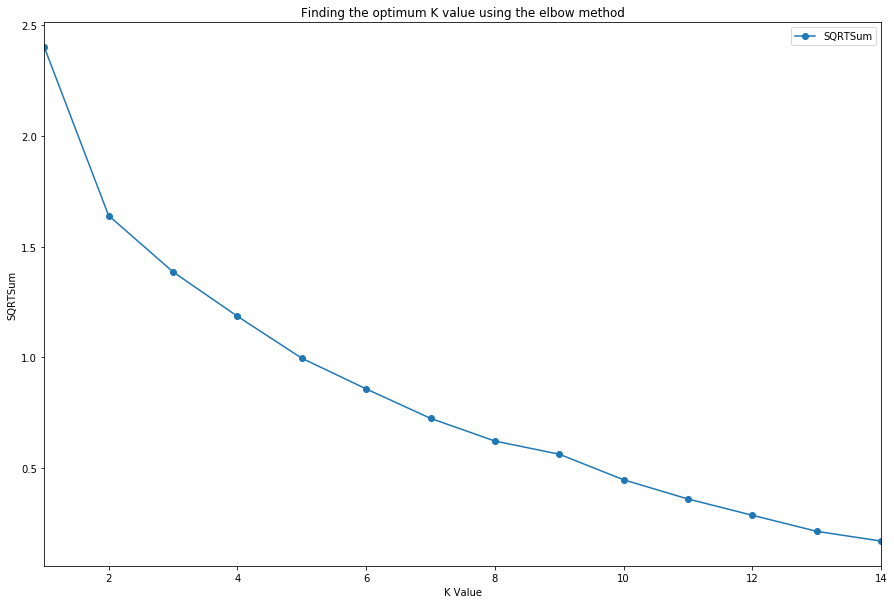

In [983]:
# Using the elbow method will allow us to spot the best value for K.
# Remeber that in order to find the best value, the inflexion point has to be located

# Drop the first column, it's a string
Mad_Ven_Cluster = OneHot_Order.drop(columns = ['Neighborhood'], axis = 1)

# Following the lab instructions...
SQRTSum = []
K_Range = range(1, 15)
for value in K_Range:
    K_Means = KMeans(n_clusters=value)
    K_Means = K_Means.fit(Mad_Ven_Cluster)
    SQRTSum.append(K_Means.inertia_)
    
# and we find the optimal K value
K_Value = pd.DataFrame(data = SQRTSum, columns = ['SQRTSum'], index=K_Range)

# Let's print out the table
K_Value.plot(kind='line', figsize=(15, 10), marker='o')
plt.xlabel('K Value')
plt.ylabel('SQRTSum')
plt.title('Finding the optimum K value using the elbow method')
plt.show()

In [1004]:
# It's hard to idenfify, but we see that there's an elbow inflexion at K Value = 6
Cluster_Num = 6

# and run K-means for our clusterK value
Means = KMeans(n_clusters = Cluster_Num, random_state = 0).fit(Mad_Ven_Cluster)
Means.labels_[0:10]

array([1, 1, 3, 1, 1, 1, 1, 1, 5, 5])

In [1005]:
# In our original dataframe, we need to drop the rows that did not return values
df['Neighborhood'] = sorted_venues['Neighborhood']
print(df.shape)
df.isnull().sum()
df.dropna(how = 'any', axis = 0, inplace = True)
print(df.shape)
print(sorted_venues.shape)

(21, 25)
(21, 25)
(21, 11)


In [1006]:
FinalDF = df
FinalDF ['K Labels'] = Means.labels_

FinalDF = FinalDF.join(sorted_venues.set_index('Neighborhood'), on='Neighborhood')
FinalDF[['Latitude', 'Longitude']] = df_co[['Latitude', 'Longitude']]
FinalDF['Latitude'] = FinalDF['Latitude'].astype(float)
FinalDF['Longitude'] = FinalDF['Longitude'].astype(float)
print(FinalDF.shape)
FinalDF # check the last columns!

(21, 37)


,Nationality,Madrid City,Centro,Arganzuela,Retiro,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,K Labels,1,2,3,4,5,6,7,8,9,10,Latitude,Longitude
0,Rumanía,45036,815,754,480,753,680,1468,597,1830,991,4904,5873,2241,4784,1286,2888,1466,3646,3384,2606,2929,661,Arganzuela,1,Spanish Restaurant,Park,Bar,Grocery Store,Plaza,Playground,Beer Garden,Tapas Restaurant,Hotel,Restaurant,40.3989,-3.7102
1,China,37276,1508,1356,564,755,652,1988,816,1733,960,2554,4398,9207,3602,564,1960,1104,1236,685,472,972,190,Barajas,1,Hostel,Coffee Shop,Food & Drink Shop,Café,Tapas Restaurant,Mexican Restaurant,Supermarket,Restaurant,Wine Shop,Dessert Shop,40.4654,-3.5952
2,Ecuador,23953,647,741,265,619,380,1395,453,632,387,2194,3674,1806,3290,491,2471,401,2017,498,439,1015,138,Carabanchel,3,Bar,Gym / Fitness Center,Gastropub,Mobile Phone Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Department Store,Farmers Market,40.3778,-3.7512
3,Venezuela,23359,1563,913,638,1564,933,1310,794,1428,630,1448,1870,875,1829,480,1858,1434,909,762,321,1486,314,Centro,1,Tapas Restaurant,Spanish Restaurant,Bar,Hotel,Plaza,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Café,Hostel,Dessert Shop,40.4615,-3.6866
4,Colombia,22618,998,717,483,803,551,822,659,999,454,1786,3395,1752,1733,482,1792,910,1618,740,384,1282,258,Chamartin,1,Spanish Restaurant,Restaurant,Mediterranean Restaurant,Tapas Restaurant,Hotel,American Restaurant,Nightclub,Paella Restaurant,Salad Place,Pizza Place,40.4115,-3.7076
5,Marruecos,21909,1101,390,184,322,280,1393,320,930,342,1539,2223,942,3437,258,1011,426,3372,1655,802,649,333,Chamberí,1,Spanish Restaurant,Restaurant,Bar,Café,Pub,Tapas Restaurant,Pizza Place,Italian Restaurant,Theater,Supermarket,40.4344,-3.7132
6,Italia,20308,3030,1219,840,1817,1060,1194,1640,1195,710,826,915,412,704,310,1258,1109,330,427,189,786,337,Ciudad Lineal,1,Spanish Restaurant,Grocery Store,Sandwich Place,Italian Restaurant,Pharmacy,Hotel,Restaurant,Café,Pizza Place,Park,40.4457,-3.6544
7,Perú,18829,563,521,253,612,419,965,567,805,368,2026,2425,1131,2079,668,1726,603,1280,564,338,810,106,Fuencarral-El Pardo,1,Clothing Store,Italian Restaurant,Fast Food Restaurant,Restaurant,Burger Joint,Tapas Restaurant,Department Store,Pizza Place,Diner,Park,40.4786,-3.7092
8,Paraguay,18682,364,474,237,521,657,3311,584,1024,636,2061,2152,727,1354,360,1619,583,870,217,199,581,151,Hortaleza,5,Supermarket,Pizza Place,Plaza,Breakfast Spot,Sandwich Place,Restaurant,Spanish Restaurant,Donut Shop,Furniture / Home Store,Clothing Store,40.4025,-3.7465
9,República Dominicana,17511,365,654,204,344,322,2272,443,589,536,1501,1607,1202,1989,223,1581,359,1881,296,151,889,103,Latina,5,Pizza Place,Supermarket,Athletics & Sports,Fast Food Restaurant,Lake,Italian Restaurant,Scenic Lookout,Metro Station,Asian Restaurant,Train Station,40.4694,-3.6425


In [1007]:
# create map
Mapping_Ks = folium.Map(location=[latitude, longitude], zoom_start=11)


# Add colors and markers to the map with an optional click on that will display the neighborhood's name and the cluster it 
# belongs to 
colors = []
for lat, lon, ven, K in zip(df_co['Latitude'], df_co['Longitude'], df_co['Neighborhood'], FinalDF['K Labels']):
    label = folium.Popup(str(ven) + ', Cluster Nº = ' + str(K), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(Mapping_Ks)
       
Mapping_Ks

#### Cluster 0

In [1008]:
FinalDF.loc[FinalDF['K Labels'] == 0, FinalDF.columns[[0] + list(range(5, FinalDF.shape[1]))]].sort_values(by = ['Nationality'], ascending = False)

,Nationality,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,K Labels,1,2,3,4,5,6,7,8,9,10,Latitude,Longitude
18,Estados Unidos de América,749,389,300,657,297,428,207,125,86,139,232,252,206,54,51,33,101,57,Vicálvaro,0,Breakfast Spot,Bar,Dog Run,Tennis Court,Supermarket,Farmers Market,Electronics Store,Dumpling Restaurant,Donut Shop,Diner,40.3469,-3.7108


#### Cluster 1

In [1009]:
FinalDF.loc[FinalDF['K Labels'] == 1, FinalDF.columns[[0] + list(range(5, FinalDF.shape[1]))]].sort_values(by = ['Nationality'], ascending = False)

,Nationality,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,K Labels,1,2,3,4,5,6,7,8,9,10,Latitude,Longitude
3,Venezuela,1564,933,1310,794,1428,630,1448,1870,875,1829,480,1858,1434,909,762,321,1486,314,Centro,1,Tapas Restaurant,Spanish Restaurant,Bar,Hotel,Plaza,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Café,Hostel,Dessert Shop,40.4615,-3.6866
15,Ucrania,220,176,221,149,312,168,1745,1251,428,912,239,348,282,1649,256,152,390,56,San Blas-Canillejas,1,Restaurant,Hotel,Asian Restaurant,Café,Spanish Restaurant,Gym / Fitness Center,Diner,Brewery,Breakfast Spot,Supermarket,40.4322,-3.6279
0,Rumanía,753,680,1468,597,1830,991,4904,5873,2241,4784,1286,2888,1466,3646,3384,2606,2929,661,Arganzuela,1,Spanish Restaurant,Park,Bar,Grocery Store,Plaza,Playground,Beer Garden,Tapas Restaurant,Hotel,Restaurant,40.3989,-3.7102
13,Portugal,695,534,590,509,693,365,533,658,283,597,173,612,727,302,262,168,565,191,Retiro,1,Spanish Restaurant,Garden,Asian Restaurant,Grocery Store,Supermarket,Dessert Shop,Bus Station,Brewery,Café,Plaza,40.4113,-3.6749
7,Perú,612,419,965,567,805,368,2026,2425,1131,2079,668,1726,603,1280,564,338,810,106,Fuencarral-El Pardo,1,Clothing Store,Italian Restaurant,Fast Food Restaurant,Restaurant,Burger Joint,Tapas Restaurant,Department Store,Pizza Place,Diner,Park,40.4786,-3.7092
5,Marruecos,322,280,1393,320,930,342,1539,2223,942,3437,258,1011,426,3372,1655,802,649,333,Chamberí,1,Spanish Restaurant,Restaurant,Bar,Café,Pub,Tapas Restaurant,Pizza Place,Italian Restaurant,Theater,Supermarket,40.4344,-3.7132
6,Italia,1817,1060,1194,1640,1195,710,826,915,412,704,310,1258,1109,330,427,189,786,337,Ciudad Lineal,1,Spanish Restaurant,Grocery Store,Sandwich Place,Italian Restaurant,Pharmacy,Hotel,Restaurant,Café,Pizza Place,Park,40.4457,-3.6544
14,Francia,968,554,387,699,366,347,196,188,66,138,85,599,1802,68,59,52,357,197,Salamanca,1,Restaurant,Spanish Restaurant,Boutique,Clothing Store,Tapas Restaurant,Jewelry Store,Hotel,Ice Cream Shop,Bakery,Furniture / Home Store,40.4279,-3.6868
4,Colombia,803,551,822,659,999,454,1786,3395,1752,1733,482,1792,910,1618,740,384,1282,258,Chamartin,1,Spanish Restaurant,Restaurant,Mediterranean Restaurant,Tapas Restaurant,Hotel,American Restaurant,Nightclub,Paella Restaurant,Salad Place,Pizza Place,40.4115,-3.7076
1,China,755,652,1988,816,1733,960,2554,4398,9207,3602,564,1960,1104,1236,685,472,972,190,Barajas,1,Hostel,Coffee Shop,Food & Drink Shop,Café,Tapas Restaurant,Mexican Restaurant,Supermarket,Restaurant,Wine Shop,Dessert Shop,40.4654,-3.5952


#### Cluster 2

In [1010]:
FinalDF.loc[FinalDF['K Labels'] == 2, FinalDF.columns[[0] + list(range(5, FinalDF.shape[1]))]].sort_values(by = ['Nationality'], ascending = False)

,Nationality,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,K Labels,1,2,3,4,5,6,7,8,9,10,Latitude,Longitude
10,Honduras,332,337,755,317,863,335,2021,2870,1115,2483,281,1062,349,1040,387,165,598,62,Moncloa-Aravaca,2,Spanish Restaurant,Wine Shop,Dessert Shop,Electronics Store,Dumpling Restaurant,Donut Shop,Dog Run,Diner,Department Store,Fast Food Restaurant,40.4072,-3.657


#### Cluster 3

In [1011]:
FinalDF.loc[FinalDF['K Labels'] == 3, FinalDF.columns[[0] + list(range(5, FinalDF.shape[1]))]].sort_values(by = ['Nationality'], ascending = False)

,Nationality,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,K Labels,1,2,3,4,5,6,7,8,9,10,Latitude,Longitude
2,Ecuador,619,380,1395,453,632,387,2194,3674,1806,3290,491,2471,401,2017,498,439,1015,138,Carabanchel,3,Bar,Gym / Fitness Center,Gastropub,Mobile Phone Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Department Store,Farmers Market,40.3778,-3.7512


#### Cluster 4

In [1012]:
FinalDF.loc[FinalDF['K Labels'] == 4, FinalDF.columns[[0] + list(range(5, FinalDF.shape[1]))]].sort_values(by = ['Nationality'], ascending = False)

,Nationality,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,K Labels,1,2,3,4,5,6,7,8,9,10,Latitude,Longitude
12,Filipinas,578,661,4473,771,442,568,629,400,225,418,76,590,300,140,25,24,152,30,Puente de Vallecas,4,Spanish Restaurant,Restaurant,Pizza Place,Tapas Restaurant,Electronics Store,Supermarket,Wine Shop,Donut Shop,Dog Run,Diner,40.387,-3.6695


#### Cluster 5

In [1013]:
FinalDF.loc[FinalDF['K Labels'] == 5, FinalDF.columns[[0] + list(range(5, FinalDF.shape[1]))]].sort_values(by = ['Nationality'], ascending = False)

,Nationality,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,K Labels,1,2,3,4,5,6,7,8,9,10,Latitude,Longitude
9,República Dominicana,344,322,2272,443,589,536,1501,1607,1202,1989,223,1581,359,1881,296,151,889,103,Latina,5,Pizza Place,Supermarket,Athletics & Sports,Fast Food Restaurant,Lake,Italian Restaurant,Scenic Lookout,Metro Station,Asian Restaurant,Train Station,40.4694,-3.6425
19,Reino Unido,550,466,329,501,313,304,211,170,81,142,59,285,319,61,49,27,120,74,Villa de Vallecas,5,Pizza Place,Cocktail Bar,Fast Food Restaurant,Spanish Restaurant,Sushi Restaurant,Gym,Skate Park,Comfort Food Restaurant,Concert Hall,Convenience Store,40.3670,-3.6061
8,Paraguay,521,657,3311,584,1024,636,2061,2152,727,1354,360,1619,583,870,217,199,581,151,Hortaleza,5,Supermarket,Pizza Place,Plaza,Breakfast Spot,Sandwich Place,Restaurant,Spanish Restaurant,Donut Shop,Furniture / Home Store,Clothing Store,40.4025,-3.7465
17,Bulgaria,113,123,245,74,316,170,996,988,395,760,285,780,283,516,261,269,662,92,Usera,5,Spanish Restaurant,Fast Food Restaurant,Grocery Store,Pizza Place,Bubble Tea Shop,Asian Restaurant,Theater,Noodle House,Dessert Shop,Donut Shop,40.3826,-3.7099
20,Bangladesh,32,21,210,48,27,14,257,410,175,649,23,179,27,489,57,32,78,2,Villaverde,5,Café,Pizza Place,Spanish Restaurant,Insurance Office,Department Store,Dumpling Restaurant,Donut Shop,Dog Run,Diner,Dessert Shop,40.3940,-3.6029


# Conclusion
As I explained in my question, the objective of this code is to find the optimum location for either a chinese or a colombian restauran.

After analizing the df, we can see that there is a ver small population of asian forigners, which is why a latin restaurant would fit better. As we can see from KCluster 1, carrying the highest ratio at 5/12 , it's the region with the highest Latin-country density. We can find popular venues such as bars and restaurants.

However, as good data scientists, we cannot focus our conclusion on a single cluster and call it a result, but we must offer other equaly acceptable outcomes. By blending clusters 1, 2, and 3 we achieve a much better result. This clust of clusters could prove useful considering all regions are close and their main foreign population originates from Latin America. Also, after careful examination, it's clear that clusters 1 and 2 offer a high density of restaurants, but none of them are Latin cuisine.  I know not all spanish speaking countries are the same, but as a Spaniard married to a latin, we can all agree that we love food, music and most impotantly, DANCING! On paper, such a venue would be successful


In conclusion, dispite my final thoughts and possible locations for a culture-fusion venue, this data can be transformed and used for different reseach purposes. By changing parameters, coordinates, and research material, this code can be extrapolated for many research puroposes. I hope it's as useful to you as it has been to me.